In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("store_info.csv")

C:\Users\lucmi\anaconda3\envs\min_ds-env\lib\site-packages\IPython\core\interactiveshell.py:3194: DtypeWarning: Columns (37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
df = df[["District", "AvgRating"]]

In [4]:
df.dtypes

District     object
AvgRating    object
dtype: object

In [5]:
df['AvgRating'].unique()

array(['9.6', '7.8', '7.9', '8.2', '8.0', '7.3', '7.6', '7.4', '7.7',
       '9.1', '9.8', '7.5', '7.2', '7.1', '6.7', '6.6', '6.3', '6.9',
       '6.8', '6.2', '7.0', '6.5', '8.1', '5.4', '6.4', '5.9', '5.1',
       '6.1', '8.5', '4.8', '_._', '9.5', '9.4', '9.3', '2.7', '8.4',
       '5.7', '9.2', '8.8', '9.0', '10.0', '6.0', '8.6', '1.0', '5.5',
       '8.9', '8.7', '8.3', '9.9', '2.8', '5.8', '9.7', '3.9', '5.6',
       '4.4', '2.6', '1.9', '4.3', '4.0', '4.6', '3.0', '5.3', '2.1',
       '4.2', '4.5', '5.0', '5.2', '1.6', '4.7', '3.5', '2.5', '3.4',
       '3.2', '4.9', '3.8', '3.6', '2.0', '2.4', '4.1', '2.9', '2.2',
       '1.2', '3.3', '3.1', '1.4', '1.8', '1.1', '3.7', '2.3', '1.5',
       '1.7', '1.3', '0.8'], dtype=object)

In [6]:
df['AvgRating'] = df['AvgRating'].str.replace('_._','nan',regex=False).astype('float32')

In [7]:
df_all = df[['District', 'AvgRating']].groupby(by='District').agg(["count","mean"])
df_all['count'] = df_all[('AvgRating', 'count')]
df_all['mean'] = df_all[('AvgRating', 'mean')]
df_all = df_all.drop(columns=[('AvgRating', 'count'), ('AvgRating', 'mean')])
df_all = df_all.reset_index(level=0)

In [8]:
df_all = df_all.loc[df_all["count"]>=1000]

In [9]:
df_all

,District,count,mean
,,,
5,Quận 1,4050,7.611259
6,Quận 10,2454,7.328239
7,Quận 11,1479,7.393577
10,Quận 3,2534,7.430071
11,Quận 4,1120,7.377054
12,Quận 5,1417,7.224206
13,Quận 6,1056,7.283049
14,Quận 7,2257,7.504874
15,Quận 8,1097,7.351960


In [10]:
df_all['mean_norm'] = df_all['mean'].apply(lambda x: x-7)

<AxesSubplot:xlabel='District', ylabel='mean_norm'>

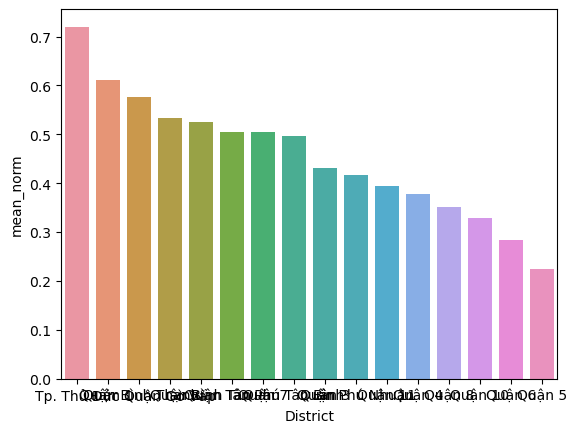

In [11]:
# fig, axs = plt.subplots(2)
sns.barplot(data=df_all, x="District", y="mean_norm",order = df_all.sort_values('mean',ascending=False)['District'])

In [12]:
df_all

,District,count,mean,mean_norm
,,,,
5,Quận 1,4050,7.611259,0.611259
6,Quận 10,2454,7.328239,0.328239
7,Quận 11,1479,7.393577,0.393577
10,Quận 3,2534,7.430071,0.430071
11,Quận 4,1120,7.377054,0.377054
12,Quận 5,1417,7.224206,0.224206
13,Quận 6,1056,7.283049,0.283049
14,Quận 7,2257,7.504874,0.504874
15,Quận 8,1097,7.351960,0.351960
